# Gradiente de gravidade de um prisma retangular 

**[Referências]**

* Nagy, D., G. Papp, and J. Benedek (2000), The gravitational potential and its derivatives for the prism: Journal of Geodesy, 74, 552–560, doi: 10.1007/s001900000116.

## Importando as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import prism_grav

## Gerando os parâmetros do sistema de coordenadas 

In [3]:
Nx = 100
Ny = 50
area = [-1250.,1250.,-1250.,1250.]
shape = (Nx,Ny)

In [4]:
x = np.linspace(area[0],area[1],num=Nx)
y = np.linspace(area[2],area[3],num=Ny) 
yc,xc = np.meshgrid(y,x)

In [5]:
voo = 0.
zc = voo*np.ones_like(xc)

In [6]:
coordenadas = np.array([yc.ravel(),xc.ravel(),zc.ravel()])

## Gerando os parâmetros do prisma

In [7]:
rho = np.array([200.])
modelo = np.array([[-100.,100.,-500.,500.,50.,150.]])

## Cálculo das componentes do campo de gravidade e do potencial

In [8]:
gxx = prism_grav.gravity_gradient(coordenadas,modelo,rho,field="g_xx")

In [9]:
gxy = prism_grav.gravity_gradient(coordenadas,modelo,rho,field="g_xy")

In [10]:
gxz = prism_grav.gravity_gradient(coordenadas,modelo,rho,field="g_xz")

In [11]:
gyy = prism_grav.gravity_gradient(coordenadas,modelo,rho,field="g_yy")

In [12]:
gyz = prism_grav.gravity_gradient(coordenadas,modelo,rho,field="g_yz")

In [13]:
gzz = prism_grav.gravity_gradient(coordenadas,modelo,rho,field="g_zz")

In [14]:
laplacian = gxx + gyy + gzz

In [15]:
laplacian

array([-7.70911113e-15, -2.35922393e-16,  1.24900090e-16, ...,
        5.55111512e-17,  4.16333634e-16, -7.43849426e-15])

## Visualização dos dados calculados 

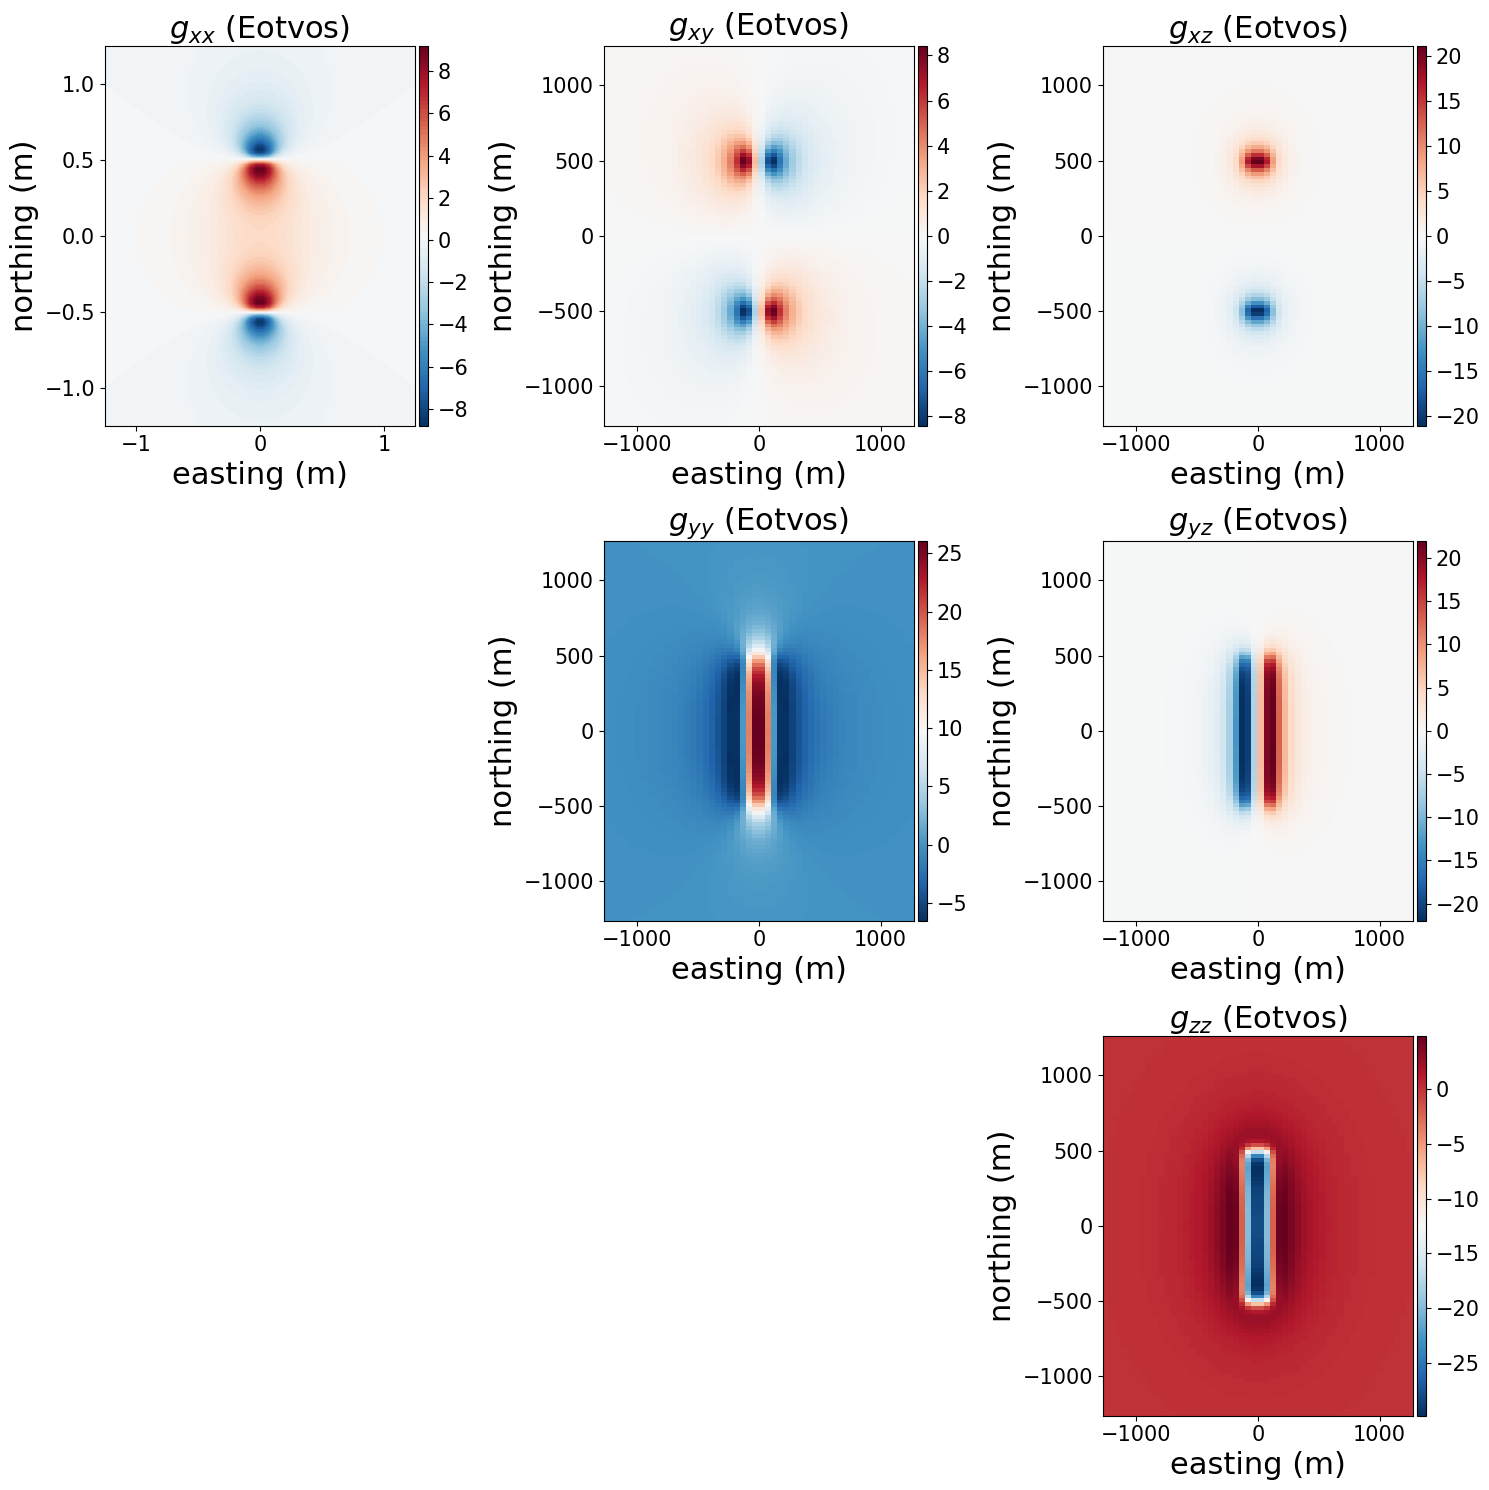

In [16]:
title_font = 22
bottom_font = 15
plt.close('all')
plt.figure(figsize=(15,15), tight_layout=True)

plt.subplot(3,3,1)
plt.xlabel('easting (m)', fontsize = title_font)
plt.ylabel('northing (m)', fontsize = title_font)
plt.title('$g_{xx}$ (Eotvos)', fontsize=title_font)
plt.contourf(1e-3*yc,1e-3*xc,gxx.reshape(shape),100,cmap='RdBu_r')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.ax.tick_params(labelsize=bottom_font)

plt.subplot(3,3,2)
plt.xlabel('easting (m)', fontsize = title_font)
plt.ylabel('northing (m)', fontsize = title_font)
plt.title('$g_{xy}$ (Eotvos)', fontsize=title_font)
plt.pcolor(yc,xc,gxy.reshape(shape),shading='auto',cmap='RdBu_r')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.ax.tick_params(labelsize=bottom_font)

plt.subplot(3,3,3)
plt.xlabel('easting (m)', fontsize = title_font)
plt.ylabel('northing (m)', fontsize = title_font)
plt.title('$g_{xz}$ (Eotvos)', fontsize=title_font)
plt.pcolor(yc,xc,gxz.reshape(shape),shading='auto',cmap='RdBu_r')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.ax.tick_params(labelsize=bottom_font)

plt.subplot(3,3,5)
plt.xlabel('easting (m)', fontsize = title_font)
plt.ylabel('northing (m)', fontsize = title_font)
plt.title('$g_{yy}$ (Eotvos)', fontsize=title_font)
plt.pcolor(yc,xc,gyy.reshape(shape),shading='auto',cmap='RdBu_r')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.ax.tick_params(labelsize=bottom_font)

plt.subplot(3,3,6)
plt.xlabel('easting (m)', fontsize = title_font)
plt.ylabel('northing (m)', fontsize = title_font)
plt.title('$g_{yz}$ (Eotvos)', fontsize=title_font)
plt.pcolor(yc,xc,gyz.reshape(shape),shading='auto',cmap='RdBu_r')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.ax.tick_params(labelsize=bottom_font)

plt.subplot(3,3,9)
plt.xlabel('easting (m)', fontsize = title_font)
plt.ylabel('northing (m)', fontsize = title_font)
plt.title('$g_{zz}$ (Eotvos)', fontsize=title_font)
plt.pcolor(yc,xc,gzz.reshape(shape),shading='auto',cmap='RdBu_r')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.ax.tick_params(labelsize=bottom_font)

file_name = 'images/forward_modeling_grav_gradient_prism'
plt.savefig(file_name+'.png',dpi=300)


plt.show()